In [1]:
#Importing the necessary libraries
import math
import numpy as np
import pandas as pd
import datetime as dt
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import statsmodels.api as sm
import warnings
import matplotlib.dates as mdates
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from sklearn.feature_selection import VarianceThreshold
import geopandas as gpd
from shapely import wkt

# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# FE / ML Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder, BinaryEncoder, CatBoostEncoder, HelmertEncoder, SumEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif, f_regression, mutual_info_classif, mutual_info_regression
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.feature_selection import RFE

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet

In [4]:
import tensorflow as tf
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers

2023-09-21 11:43:24.213179: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-21 11:43:24.232277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
cwd = os.getcwd()
DATA_PATH = os.path.join(cwd, '..', 'data')
RAW_DATA_PATH = os.path.join(DATA_PATH, 'raw')
PROCESSED_DATA_PATH = os.path.join(DATA_PATH, 'processed')

In [6]:
def load_dataframes_from_csv(suffix='_5', directory='../data/interim/train'):
    # Read the csv files and convert them to dataframes
    X_train = pd.read_csv(os.path.join(directory, f'x_train{suffix}.csv'))
    y_train = pd.read_csv(os.path.join(directory, f'y_train{suffix}.csv'))
    X_val = pd.read_csv(os.path.join(directory, f'x_val{suffix}.csv'))
    y_val = pd.read_csv(os.path.join(directory, f'y_val{suffix}.csv'))
    X_test = pd.read_csv(os.path.join(directory, f'x_test{suffix}.csv'))
    y_test = pd.read_csv(os.path.join(directory, f'y_test{suffix}.csv'))

    return X_train, y_train, X_val, y_val, X_test, y_test

# Call the function
X_train, y_train, X_val, y_val, X_test, y_test = load_dataframes_from_csv()


In [7]:
# Check for NaNs
if X_train.isnull().values.any() or X_val.isnull().values.any() or X_test.isnull().values.any():
    print("Data contains NaN values. Please clean the data.")

# Check shapes
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")


Train shape: (44762, 460), (44762, 1)
Validation shape: (9593, 460), (9593, 1)
Test shape: (9592, 460), (9592, 1)


Epoch 1/50
1399/1399 [==============================] - 7s 5ms/step - loss: 61.4212 - mae: 6.1402 - val_loss: 51.7309 - val_mae: 5.6351
Epoch 2/50
1399/1399 [==============================] - 6s 4ms/step - loss: 54.5341 - mae: 5.9487 - val_loss: 51.5393 - val_mae: 5.6401
Epoch 3/50
1399/1399 [==============================] - 6s 4ms/step - loss: 54.1082 - mae: 5.9307 - val_loss: 54.8164 - val_mae: 5.7825
Epoch 4/50
1399/1399 [==============================] - 5s 4ms/step - loss: 53.7831 - mae: 5.9131 - val_loss: 51.9467 - val_mae: 5.6520
Epoch 5/50
1399/1399 [==============================] - 5s 4ms/step - loss: 53.6428 - mae: 5.9028 - val_loss: 51.6758 - val_mae: 5.6476
Epoch 6/50
1399/1399 [==============================] - 5s 4ms/step - loss: 53.4920 - mae: 5.8936 - val_loss: 52.0359 - val_mae: 5.6580
Epoch 7/50
1399/1399 [==============================] - 5s 4ms/step - loss: 53.3212 - mae: 5.8851 - val_loss: 51.4823 - val_mae: 5.6322
Epoch 8/50
1399/1399 [==========================

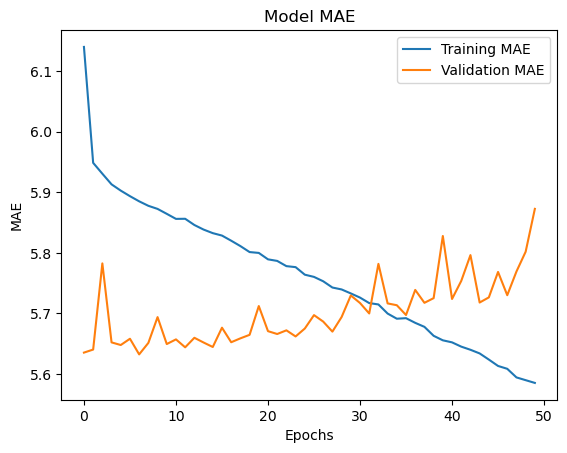

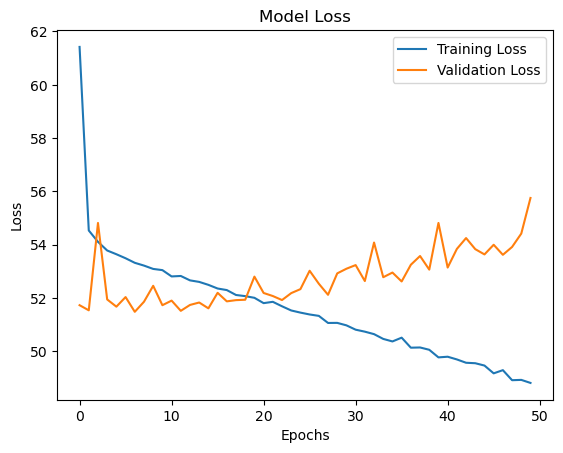

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

def build_train_best_model(X_train, y_train, X_val, y_val):
    """
    Build, compile, and train the best model based on optimized hyperparameters.
    Then, plot the learning curves.
    """
    # Build the best model
    best_model = models.Sequential([
        layers.Dense(416, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(1)
    ])

    # Compile the best model
    best_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='mse',
        metrics=['mae']
    )

    # Train the best model
    history = best_model.fit(
        X_train, y_train,
        epochs=50,  # You can adjust this based on your observations
        validation_data=(X_val, y_val)
    )
    
    # Plotting learning curves
    plot_learning_curve(history)

def plot_learning_curve(history):
    # Plotting accuracy and validation accuracy
    plt.figure()
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    # Plotting loss and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

build_train_best_model(X_train, y_train, X_val, y_val)
